## Imports

In [1]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np
from functions import *

## Save Fig?

In [2]:
SAVE_FIG = False

## Get the Data Paths

In [6]:
# Get the lists of file paths
non_robust_agents = getFilePaths(Path.cwd(), header="Select the File", verbose=True)
robust_agents = getFilePaths(Path.cwd(), header="Select the File", verbose=True)

In [24]:
# Get the list of dataframes from the lists of file paths
non_robust_dfs = readCSVFiles(non_robust_agents)
robust_dfs = readCSVFiles(robust_agents)

## Average the data in Data Paths

In [40]:
# get the list of average and std for all the dataframes
unique_headers = ['Time', 'Reward', 'Input', 'RodPos', 'RodVel', 'ActPos',
       'ActVel']

non_robust_dfs_2 = []
for data in non_robust_dfs:
    non_robust_dfs_2.append(parseDataFrame(data, unique_headers))

robust_dfs_2 = []
for data in robust_dfs:
    robust_dfs_2.append(parseDataFrame(data, unique_headers))

## Plot All

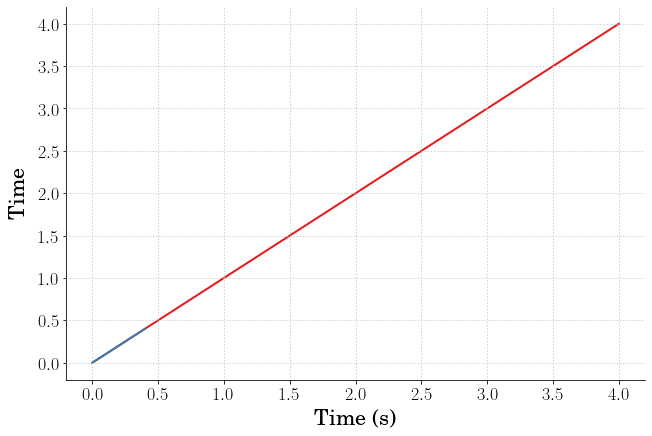

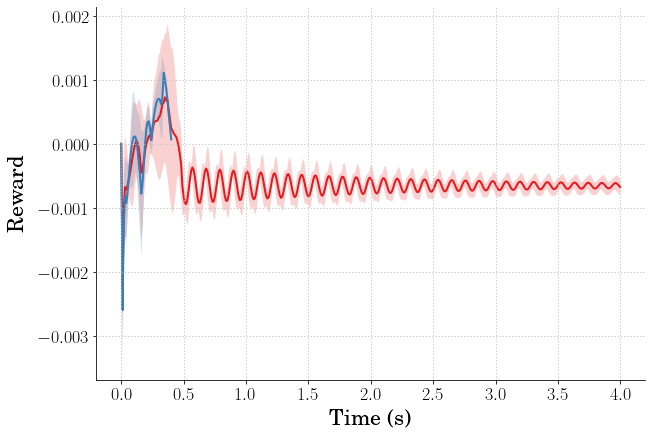

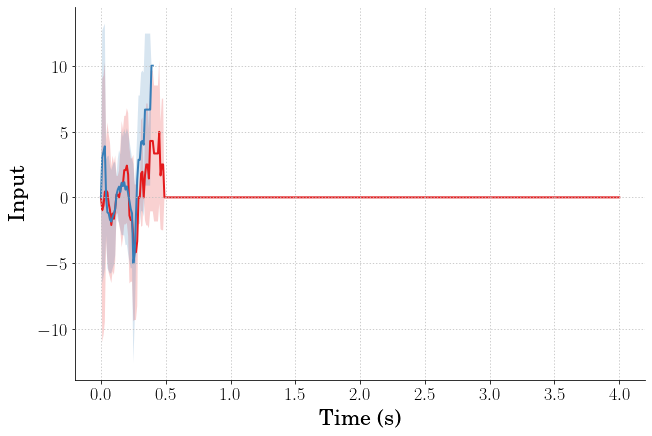

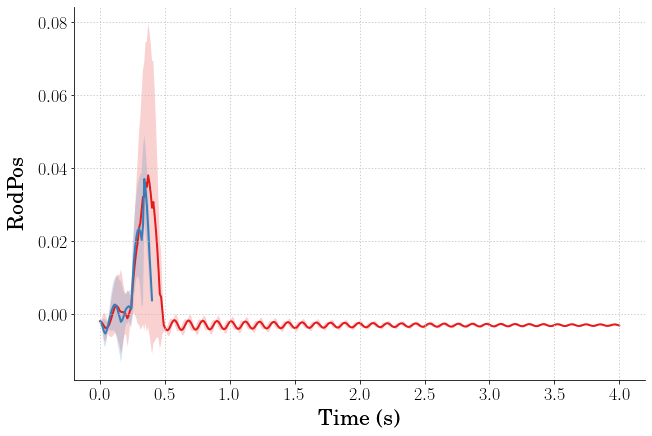

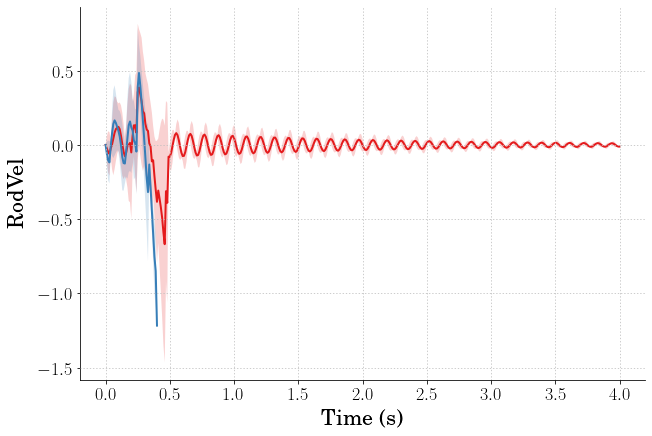

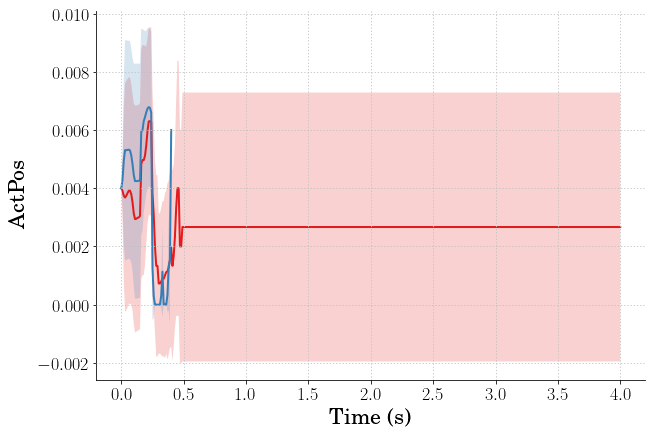

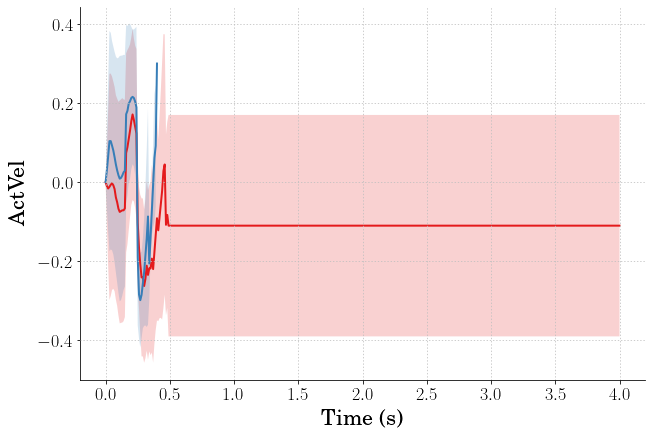

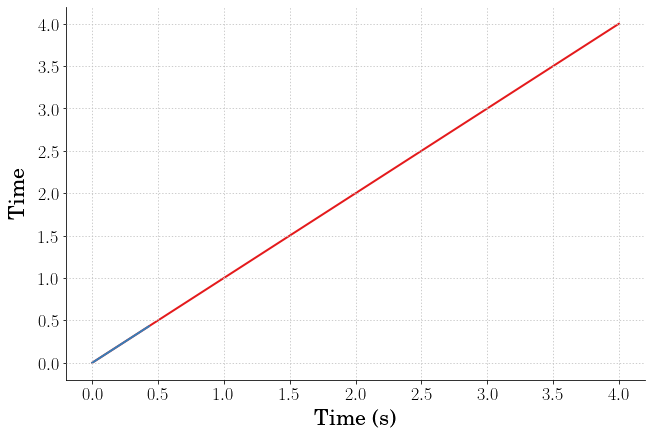

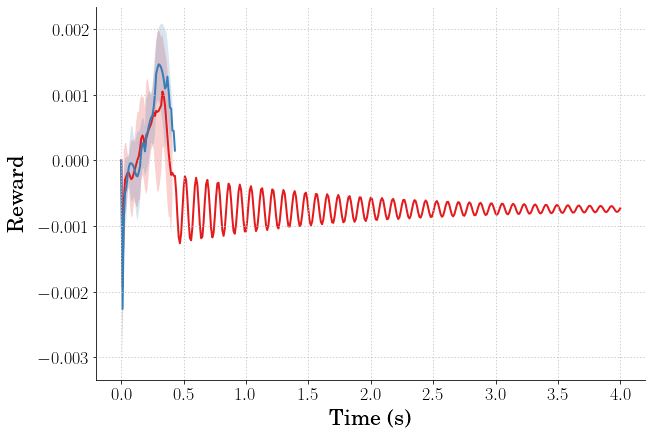

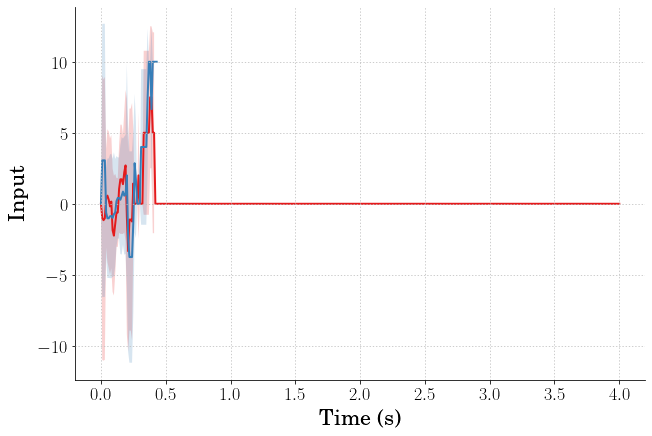

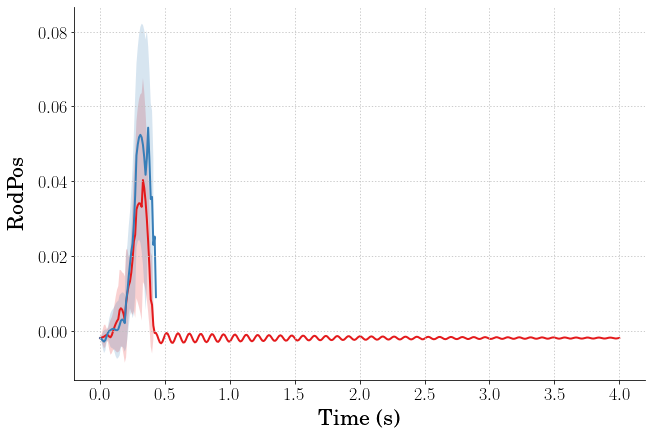

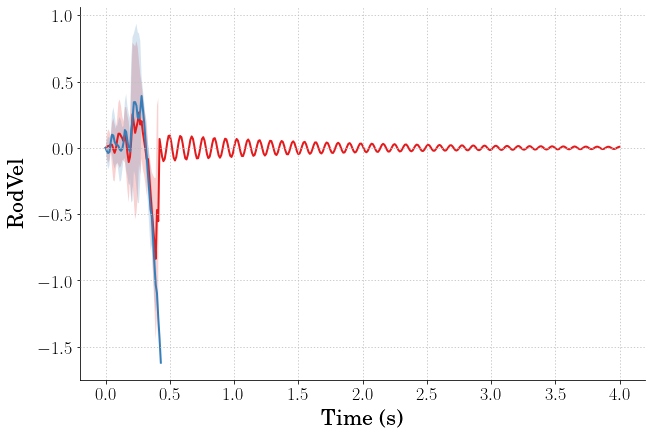

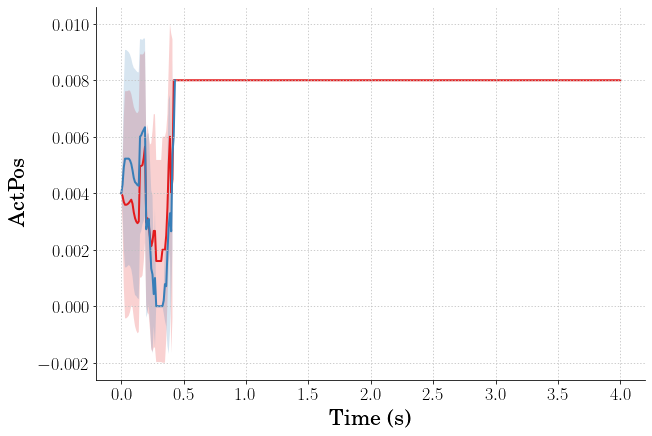

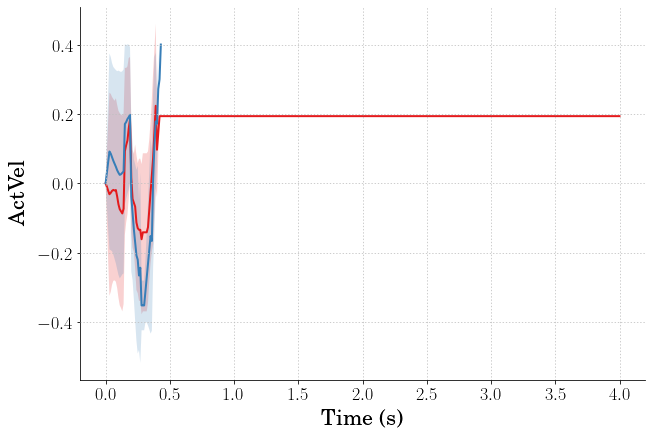

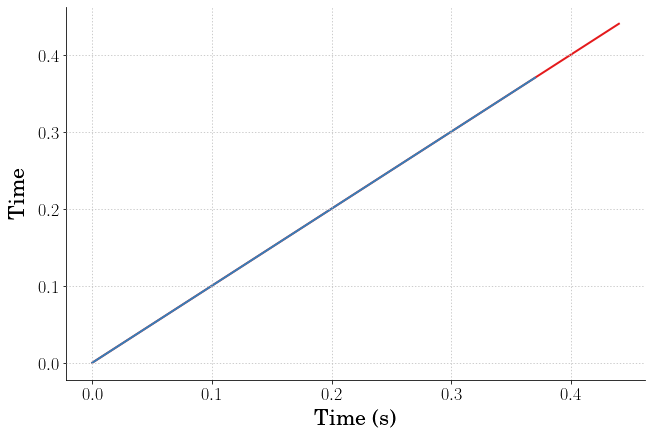

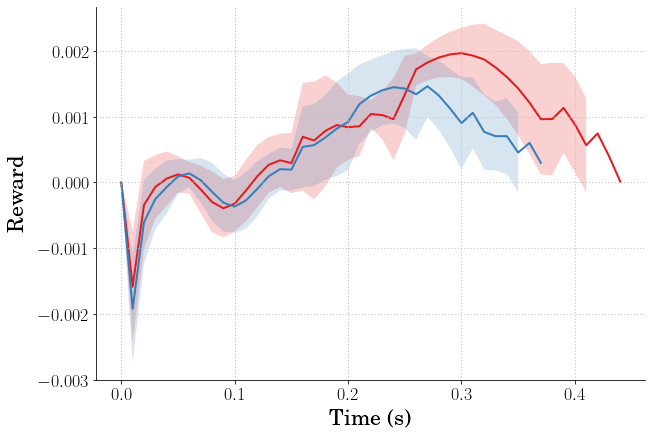

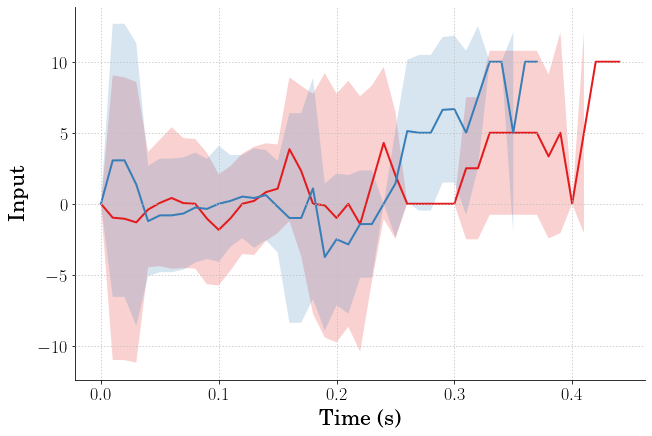

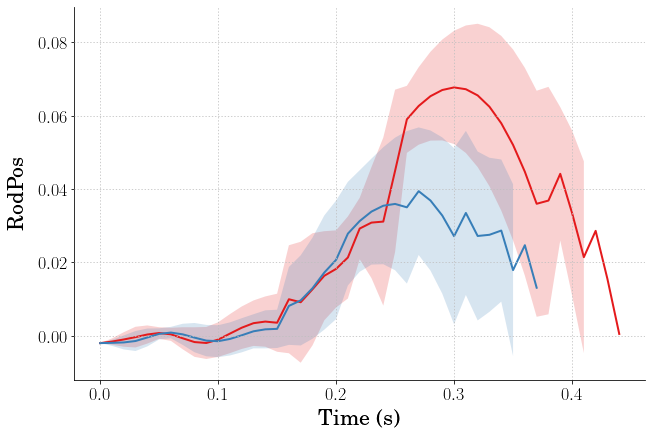

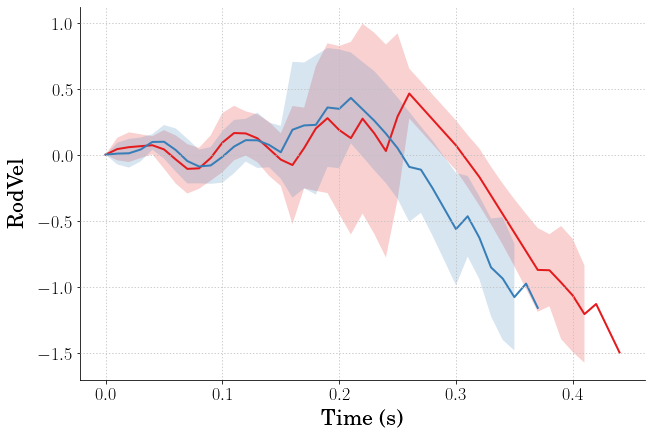

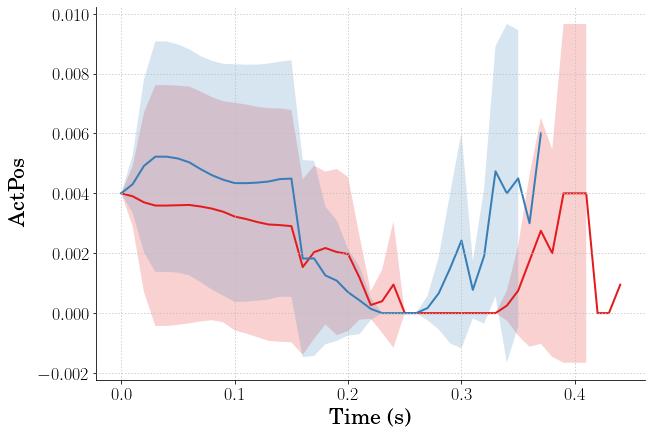

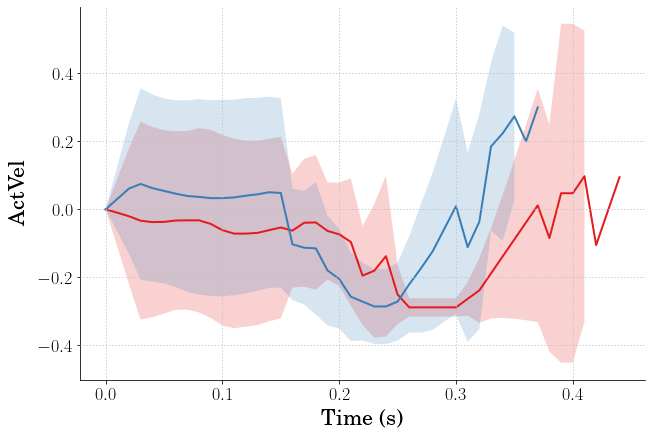

In [48]:
for data_spring in range(len(non_robust_dfs_2)):
    for header in non_robust_dfs_2[data_spring]:

        X_NR_MEAN, X_NR_STD = dfAverageStd(non_robust_dfs_2[data_spring]["Time"])
        Y_NR_MEAN, Y_NR_STD = dfAverageStd(non_robust_dfs_2[data_spring][header])

        X_R_MEAN, X_R_STD = dfAverageStd(robust_dfs_2[data_spring]["Time"])
        Y_R_MEAN, Y_R_STD = dfAverageStd(robust_dfs_2[data_spring][header])

        # Set the plot size - 3x2 aspect ratio is best
        fig = plt.figure(figsize=(9,6))
        ax = plt.gca()

        # Define the X and Y axis labels
        plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
        plt.ylabel(header, fontsize=22, weight='bold', labelpad=10)

        plt.plot(X_NR_MEAN, Y_NR_MEAN, linewidth=2, linestyle='-', label=header)
        plt.fill_between(X_NR_MEAN, Y_NR_MEAN - Y_NR_STD, Y_NR_MEAN + Y_NR_STD, alpha=0.2)
        plt.plot(X_R_MEAN, Y_R_MEAN, linewidth=2, linestyle='-', label=header)
        plt.fill_between(X_R_MEAN, Y_R_MEAN - Y_R_STD, Y_R_MEAN + Y_R_STD, alpha=0.2)
                
        # uncomment below and set limits if needed
        # plt.xlim(0,1.25)
        # plt.ylim(bottom=None, top=1.75)

        # Create the legend, then fix the fontsize
        # leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
        # ltext  = leg.get_texts()
        # plt.setp(ltext, fontsize=18)

        # Adjust the page layout filling the page using the new tight_layout command
        plt.tight_layout(pad=0.5)

        # save the figure as a high-res pdf in the current folder
        # filename = 'MostEfficientAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
        # path = save_path / filename
        # if SAVE_FIG is True:
            # plt.savefig(path, transparent=True)
            # pass
        plt.show()